In [1]:
#EDA

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("train_revised.csv")

# Basic information about the dataset
info = df.info()
shape = df.shape
head = df.head()
summary = df.describe(include='all')

shape, info, head, summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


((51645, 10),
 None,
    ride_id seat_number payment_method payment_receipt travel_date travel_time  \
 0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
 1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
 2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
 3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
 4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   
 
   travel_from travel_to car_type  max_capacity  
 0      Migori   Nairobi      Bus            49  
 1      Migori   Nairobi      Bus            49  
 2      Keroka   Nairobi      Bus            49  
 3    Homa Bay   Nairobi      Bus            49  
 4      Migori   Nairobi      Bus            49  ,
              ride_id seat_number payment_method payment_receipt travel_date  \
 count   51645.000000       51645          51645           51645       51645   
 unique           NaN   

In [12]:
# Step 1: Count seats sold per ride_id
seat_counts = df.groupby("ride_id").size().reset_index(name="seats_sold")

# Step 2: Deduplicate ride-level info
ride_level_data = df.drop_duplicates(subset="ride_id").copy()

# Step 3: Merge the seat count as the target variable
ride_level_data = ride_level_data.merge(seat_counts, on="ride_id")

# Convert travel_date and travel_time to datetime objects
ride_level_data["travel_date"] = pd.to_datetime(ride_level_data["travel_date"], format="%d-%m-%y")
ride_level_data["travel_hour"] = pd.to_datetime(ride_level_data["travel_time"], format="%H:%M").dt.hour
ride_level_data["day_of_week"] = ride_level_data["travel_date"].dt.day_name()

ride_level_data.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,seats_sold,travel_hour,day_of_week
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,7,Tuesday
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,7,Sunday
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1,7,Sunday
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5,7,Monday
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,31,7,Monday


/tmp/ipython-input-13-2229612676.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_origins.values, y=top_origins.index, palette="viridis")
/tmp/ipython-input-13-2229612676.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="travel_hour", y="seats_sold", data=ride_level_data, palette="coolwarm")
/tmp/ipython-input-13-2229612676.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day_of_week", y="seats_sold", data=ride_level_data, order=order, palette="Set2")
/tmp/ipython-input-13-2229612676.py:34: FutureWarning: 

Passing `pa

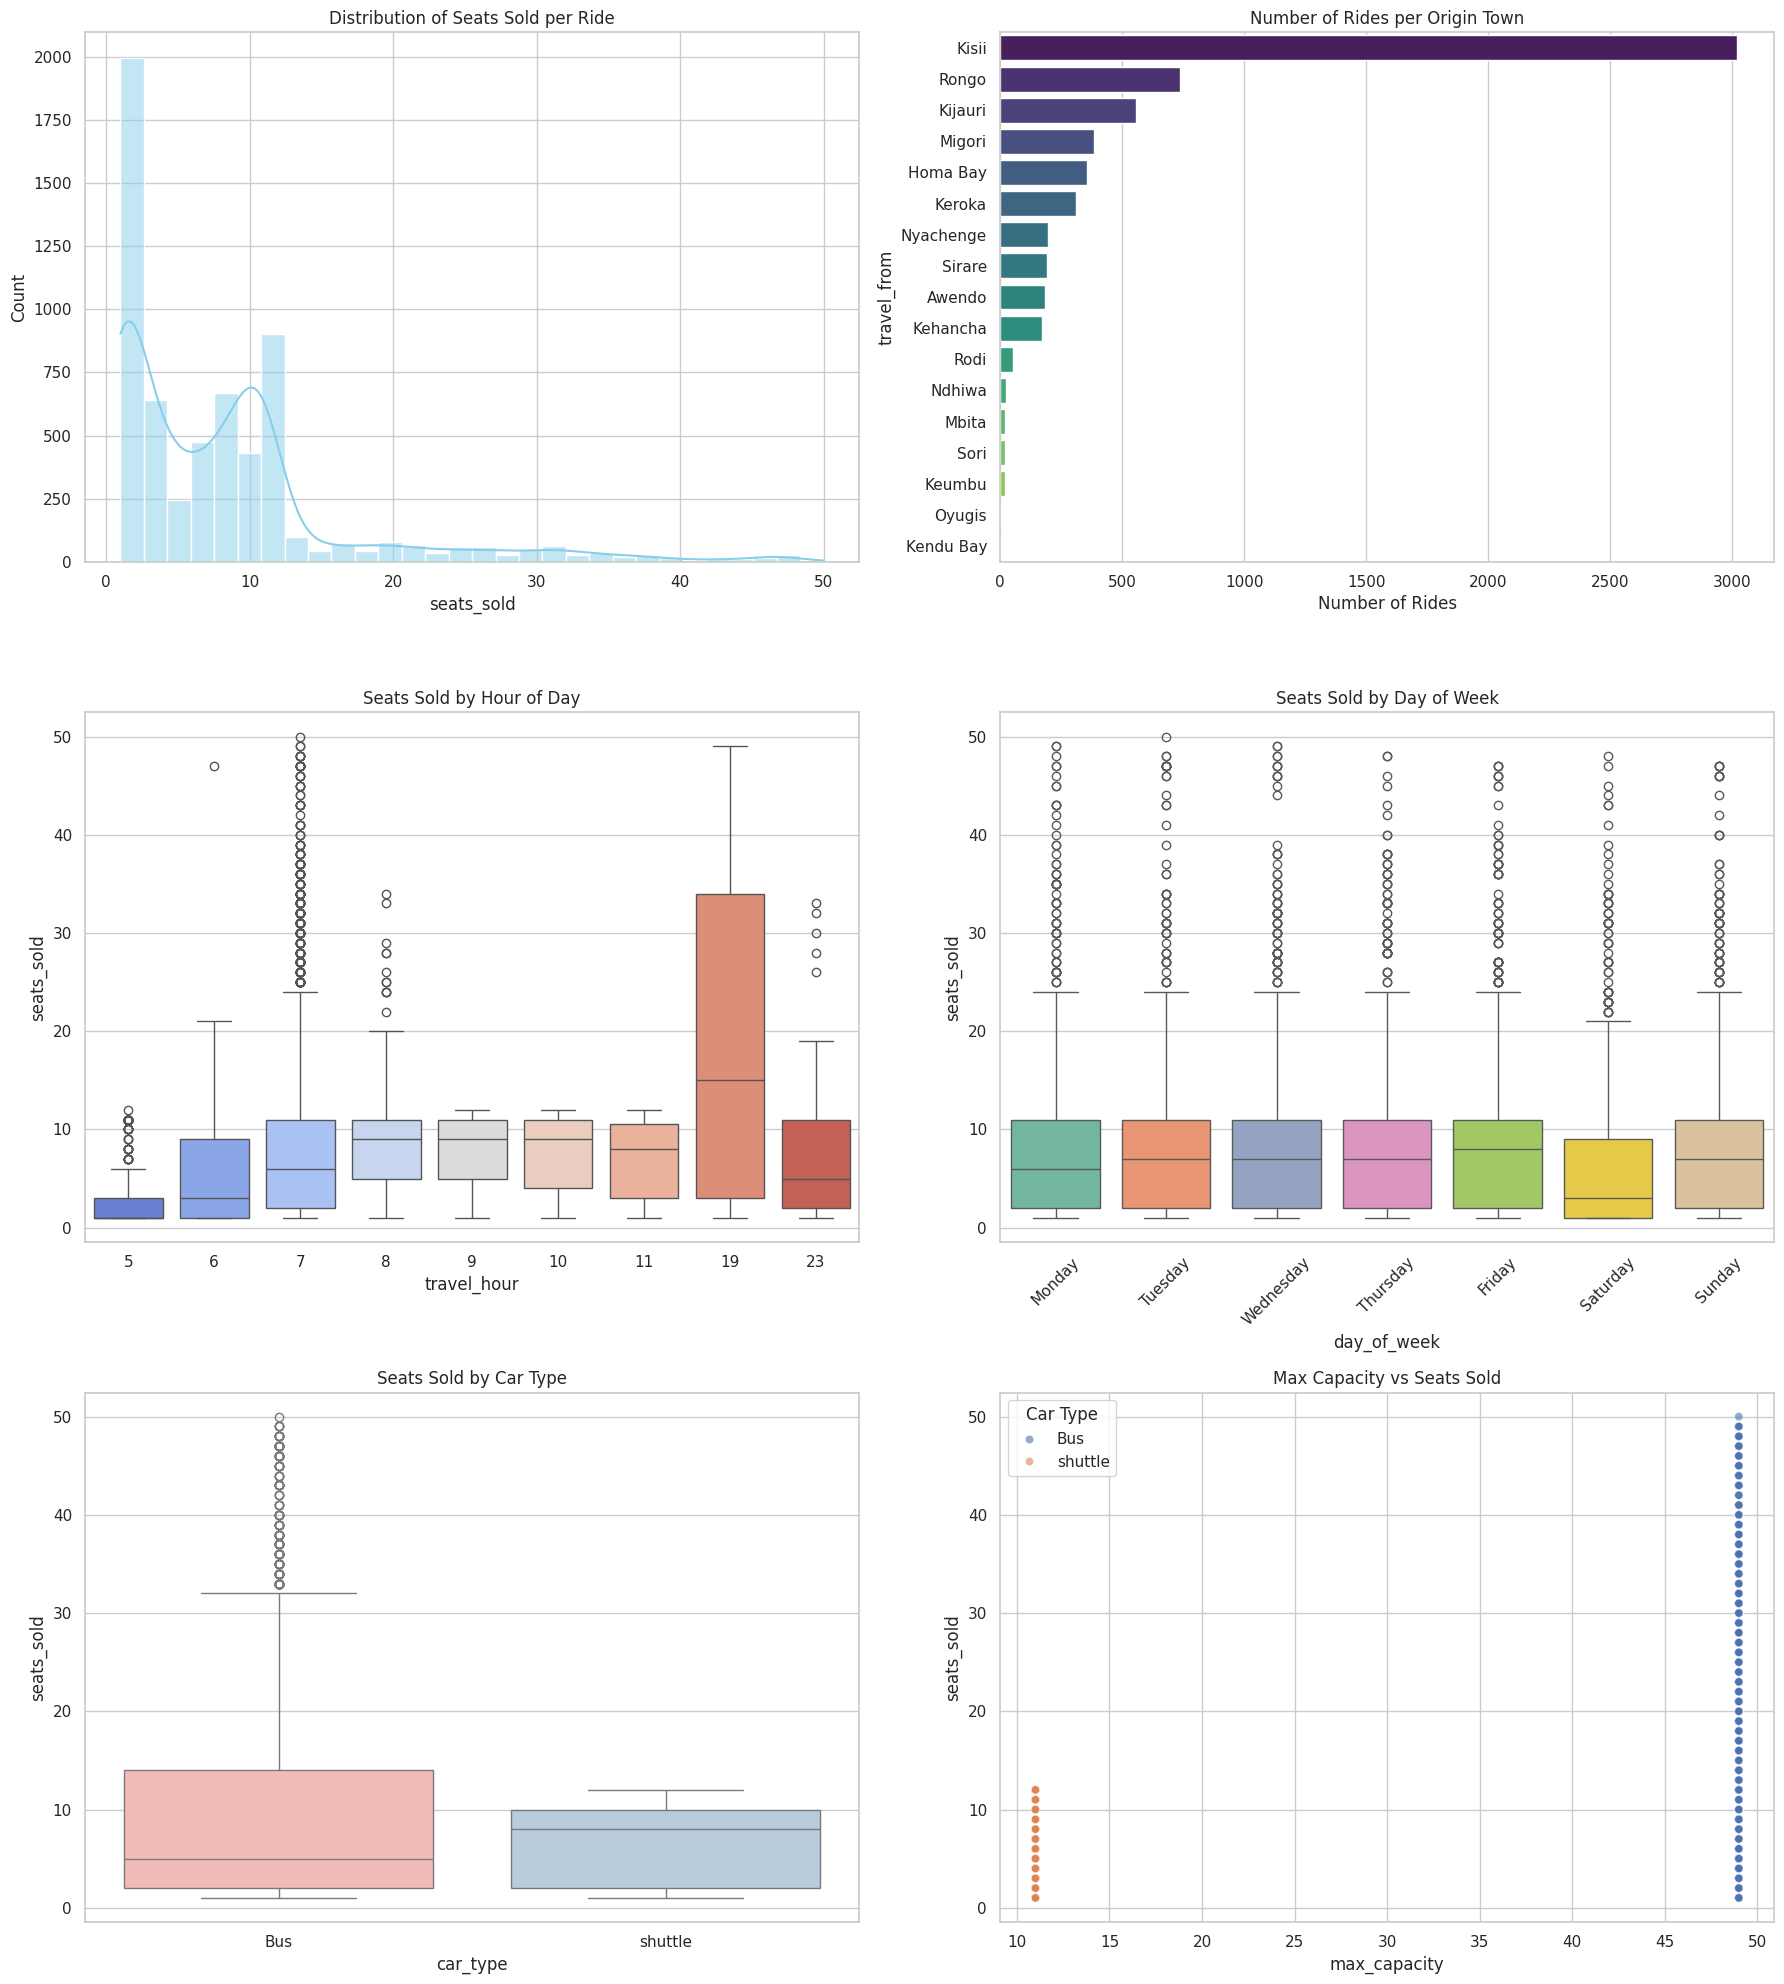

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")
plt.figure(figsize=(18, 20))

# 1. Distribution of seats sold
plt.subplot(3, 2, 1)
sns.histplot(ride_level_data["seats_sold"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Seats Sold per Ride")

# 2. Top routes by frequency
plt.subplot(3, 2, 2)
top_origins = ride_level_data["travel_from"].value_counts().sort_values(ascending=False)
sns.barplot(x=top_origins.values, y=top_origins.index, palette="viridis")
plt.title("Number of Rides per Origin Town")
plt.xlabel("Number of Rides")

# 3. Seats sold by hour of day
plt.subplot(3, 2, 3)
sns.boxplot(x="travel_hour", y="seats_sold", data=ride_level_data, palette="coolwarm")
plt.title("Seats Sold by Hour of Day")

# 4. Seats sold by day of week
plt.subplot(3, 2, 4)
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.boxplot(x="day_of_week", y="seats_sold", data=ride_level_data, order=order, palette="Set2")
plt.title("Seats Sold by Day of Week")
plt.xticks(rotation=45)

# 5. Seats sold by car type
plt.subplot(3, 2, 5)
sns.boxplot(x="car_type", y="seats_sold", data=ride_level_data, palette="Pastel1")
plt.title("Seats Sold by Car Type")

# 6. Max capacity vs seats sold
plt.subplot(3, 2, 6)
sns.scatterplot(x="max_capacity", y="seats_sold", data=ride_level_data, hue="car_type", alpha=0.6)
plt.title("Max Capacity vs Seats Sold")
plt.legend(title="Car Type")

plt.tight_layout()
plt.show()


In [ ]:
# Clean-Up

In [6]:
# Drop columns not useful for modeling
columns_to_drop = ["seat_number", "payment_receipt", "travel_to"]
cleaned_data = ride_level_data.drop(columns=columns_to_drop)

# Check for missing values
missing_values = cleaned_data.isnull().sum()

# Display unique values in key categorical columns
unique_payment_methods = cleaned_data["payment_method"].unique()
unique_car_types = cleaned_data["car_type"].unique()
unique_origins = cleaned_data["travel_from"].unique()

cleaned_data.head(), missing_values, unique_payment_methods, unique_car_types, unique_origins


(   ride_id payment_method travel_date travel_time travel_from car_type  \
 0     1442          Mpesa  2017-10-17        7:15      Migori      Bus   
 1     5437          Mpesa  2017-11-19        7:12      Migori      Bus   
 2     5710          Mpesa  2017-11-26        7:05      Keroka      Bus   
 3     5777          Mpesa  2017-11-27        7:10    Homa Bay      Bus   
 4     5778          Mpesa  2017-11-27        7:12      Migori      Bus   
 
    max_capacity  seats_sold  travel_hour day_of_week  
 0            49           1            7     Tuesday  
 1            49           1            7      Sunday  
 2            49           1            7      Sunday  
 3            49           5            7      Monday  
 4            49          31            7      Monday  ,
 ride_id           0
 payment_method    0
 travel_date       0
 travel_time       0
 travel_from       0
 car_type          0
 max_capacity      0
 seats_sold        0
 travel_hour       0
 day_of_week       0
 

In [7]:
# Drop high-cardinality or irrelevant columns
columns_to_drop = ["seat_number", "payment_receipt", "travel_to"]
cleaned_data = ride_level_data.drop(columns=columns_to_drop)

# Check for missing values
print("Missing Values:\n", cleaned_data.isnull().sum())

# Preview unique values for key columns
print("\nPayment Methods:", cleaned_data["payment_method"].unique())
print("Car Types:", cleaned_data["car_type"].unique())
print("Origins:", cleaned_data["travel_from"].unique())


Missing Values:
 ride_id           0
payment_method    0
travel_date       0
travel_time       0
travel_from       0
car_type          0
max_capacity      0
seats_sold        0
travel_hour       0
day_of_week       0
dtype: int64

Payment Methods: ['Mpesa' 'Cash']
Car Types: ['Bus' 'shuttle']
Origins: ['Migori' 'Keroka' 'Homa Bay' 'Kisii' 'Keumbu' 'Rongo' 'Kijauri' 'Oyugis'
 'Awendo' 'Sirare' 'Nyachenge' 'Kehancha' 'Kendu Bay' 'Sori' 'Rodi'
 'Mbita' 'Ndhiwa']


In [ ]:
#Feature Engineering

In [8]:
# 1. Estimate arrival hour (modulo 24)
cleaned_data["arrival_hour"] = (cleaned_data["travel_hour"] + 10) % 24

# 2. Peak traffic logic
def is_peak(hour):
    return (7 <= hour <= 10) or (16 <= hour <= 19)

cleaned_data["arrives_in_peak_traffic"] = cleaned_data["arrival_hour"].apply(is_peak)

# 3. Weekend flag
cleaned_data["is_weekend"] = cleaned_data["day_of_week"].isin(["Saturday", "Sunday"])

# 4. One-hot encoding
encoded_data = pd.get_dummies(cleaned_data, columns=["travel_from", "car_type", "payment_method", "day_of_week"], drop_first=True)

# Drop original datetime/time columns if not needed
encoded_data = encoded_data.drop(columns=["travel_date", "travel_time"])


In [ ]:
#pre-processing

In [9]:
from sklearn.model_selection import train_test_split

# Define features and target
X = encoded_data.drop(columns=["seats_sold", "ride_id"])  # exclude ID and target
y = encoded_data["seats_sold"]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Optional) Feature scaling (for non-tree models like Linear Regression)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
#Model Implementation

In [10]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluation
print("📊 Random Forest")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))

print("\n📊 XGBoost")
print("MAE:", mean_absolute_error(y_test, xgb_preds))
print("R² Score:", r2_score(y_test, xgb_preds))

# Generate predictions (Random Forest)
final_preds = rf.predict(X_test)

# Prepare results DataFrame
results_df = X_test.copy()
results_df["ride_id"] = encoded_data.loc[X_test.index, "ride_id"]
results_df["predicted_seats_sold"] = final_preds.round().astype(int)

# Reorder for readability
results_df = results_df[["ride_id", "predicted_seats_sold"] + [col for col in results_df.columns if col not in ["ride_id", "predicted_seats_sold"]]]

# Preview predictions
print(results_df.head())

# Save predictions to CSV
results_df.to_csv("mobiticket_predicted_seats.csv", index=False)

print("✅ File saved as: mobiticket_predicted_seats.csv")


📊 Random Forest
MAE: 4.4417650888309925
R² Score: 0.46987448854773173

📊 XGBoost
MAE: 4.399054527282715
R² Score: 0.4737892150878906
      ride_id  predicted_seats_sold  max_capacity  travel_hour  arrival_hour  \
2164     8771                     8            11           10            20   
611      6794                     9            11            9            19   
3524    10553                     5            11           10            20   
2292     8946                     8            11           10            20   
5084    12375                     4            49            6            16   

      arrives_in_peak_traffic  is_weekend  travel_from_Homa Bay  \
2164                    False        True                 False   
611                      True       False                 False   
3524                    False       False                 False   
2292                    False       False                 False   
5084                     True       False          

In [ ]:
#model explainabilty

/tmp/ipython-input-11-493429496.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:20], y=features[indices][:20], palette="viridis")


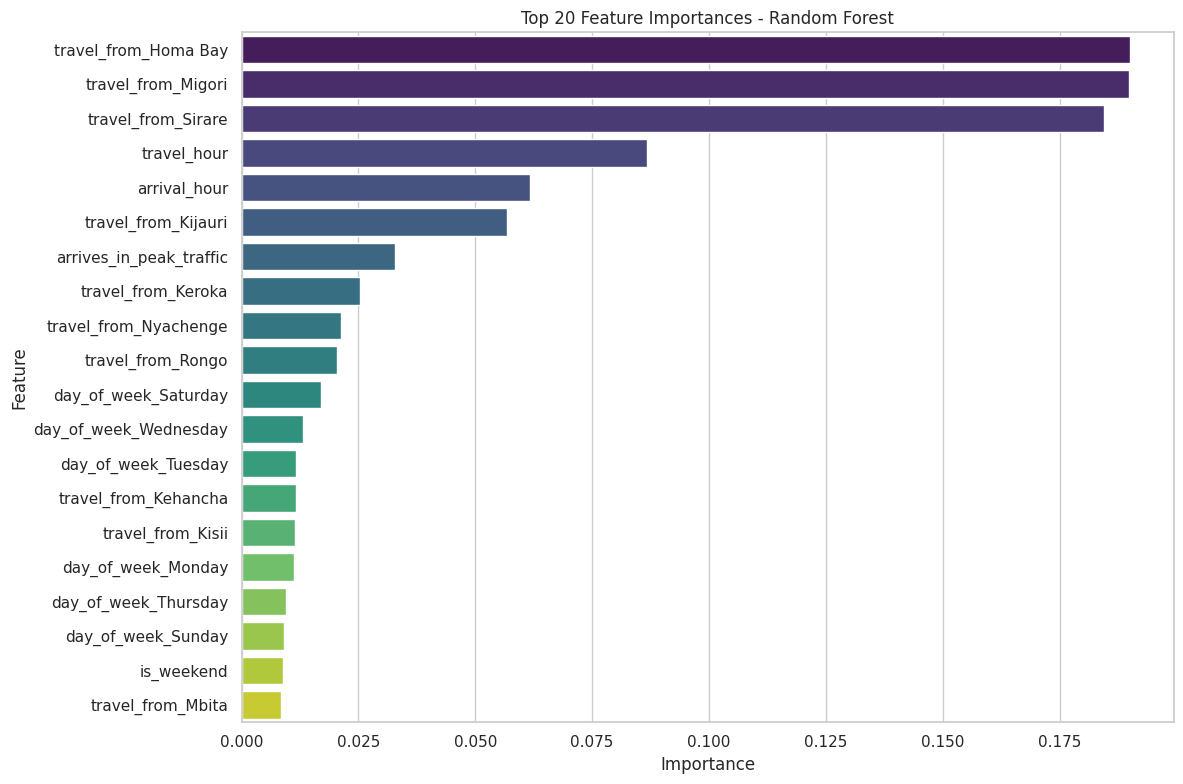

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importance from Random Forest
importances = rf.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices][:20], y=features[indices][:20], palette="viridis")
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
